<a href="https://colab.research.google.com/github/jamesjulius-02/Hotel-Management-System/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Example data
data = {
'Age': [29, 45, 50, 48, 39, 50, 55, 60, 62, 43],
'Cholesterol': [220, 250, 230, 180, 240, 290, 310, 275, 300, 280],
'Max_Heart_Rate': [180, 165, 170, 190, 155, 160, 150, 140, 130, 148],
'Heart_Disease': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0]
}

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data)

# Independent variable (features) and dependent variable (target)
X = df[['Age', 'Cholesterol', 'Max_Heart_Rate']]
Y = df['Heart_Disease']

# Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Creating and training the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [7]:
# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(f"Feature Importances:\n{feature_importances}")


Feature Importances:
                Importance
Cholesterol       0.416189
Max_Heart_Rate    0.296266
Age               0.287545


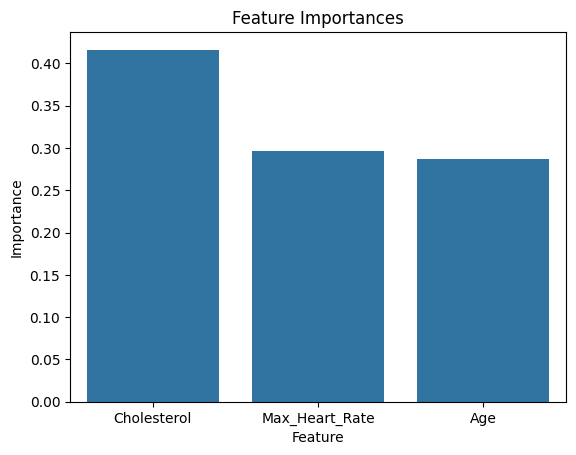

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
